In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from numba import cuda
import random
tf.keras.backend.clear_session()

In [3]:
mnist = tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [4]:
X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0

Text(0.5, 0, '9')

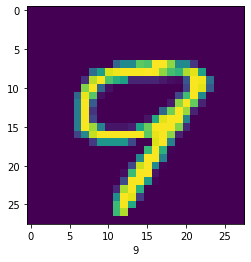

In [17]:
plt.figure()
num = random.randint(0,len(X_train))
plt.imshow(X_train[num])
plt.xlabel(y_train[num])


In [19]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [20]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        if logs.get('acc')>0.98:
            print("Reached 98% accuracy so cancelling training.")
            self.model.stop_training = True

In [21]:
callbacks = MyCallback()


In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (28,28,1)),  #26x26
    tf.keras.layers.MaxPooling2D(2,2),                                           #13x13
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),                          #11x11
    tf.keras.layers.MaxPooling2D(2,2),                                           #5x5
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation='softmax')
    
])

In [23]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer='adam',metrics= ['acc'])


In [24]:
history = model.fit(X_train,y_train,epochs=15,callbacks=[callbacks])

Epoch 1/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1314 - acc: 0.9597
Epoch 2/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0449 - acc: 0.9859


In [25]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0409 - acc: 0.9865


[0.04086022824048996, 0.9865000247955322]

In [26]:
cuda.close()